### mmm 

In [1]:
import numpy as np

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Download the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# The training data has 60000 samples (28x28 images)
print train_images.shape
# Each image has a label (0 to 9)
print len(train_labels)
train_labels

(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
# The test data has 10000 samples (28x28 images)
print test_images.shape
# Each image has a label (0 to 9)
print len(test_labels)
test_labels

(10000, 28, 28)
10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
# Reshape the samples (each sample has 28*28 'features') and normalize between 0-1
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

val_images = train_images[:15000,:]
val_labels = train_labels[:15000,:]

train_images = train_images[15000:,:]
train_labels = train_labels[15000:,:]


In [26]:
# Define the network (one layer of 512 units and an output of 10 units)
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history1 = network.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(val_images, val_labels))

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 4s 99us/step - loss: 0.2899 - acc: 0.9174 - val_loss: 0.1620 - val_acc: 0.9527
Epoch 2/25
45000/45000 [==============================] - 4s 86us/step - loss: 0.1211 - acc: 0.9648 - val_loss: 0.1225 - val_acc: 0.9644
Epoch 3/25
45000/45000 [==============================] - 3s 78us/step - loss: 0.0802 - acc: 0.9764 - val_loss: 0.0951 - val_acc: 0.9718
Epoch 4/25
45000/45000 [==============================] - 4s 81us/step - loss: 0.0571 - acc: 0.9826 - val_loss: 0.0888 - val_acc: 0.9735
Epoch 5/25
45000/45000 [==============================] - 4s 78us/step - loss: 0.0426 - acc: 0.9874 - val_loss: 0.0905 - val_acc: 0.9737
Epoch 6/25
45000/45000 [==============================] - 4s 84us/step - loss: 0.0324 - acc: 0.9906 - val_loss: 0.0788 - val_acc: 0.9771
Epoch 7/25
45000/45000 [==============================] - 4s 79us/step - loss: 0.0243 - acc: 0.9928 - val_loss: 0.0821 - val_acc

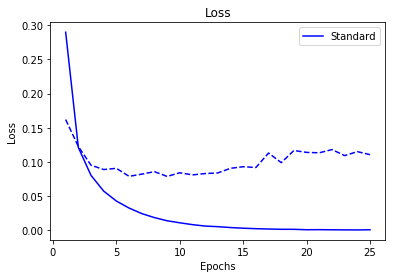

In [27]:
# Plot the training loss

epochs = range(1, len(history1.history['acc']) + 1)

plt.plot(epochs, history1.history['loss'], 'b', linestyle='-', label='Standard')
plt.plot(epochs, history1.history['val_loss'], 'b', linestyle='--')

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [19]:
# Adding L2 regularization

from keras import regularizers

network = models.Sequential()

network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history2 = network.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(val_images, val_labels))

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 4s 97us/step - loss: 0.5405 - acc: 0.9112 - val_loss: 0.3512 - val_acc: 0.9388
Epoch 2/25
45000/45000 [==============================] - 4s 87us/step - loss: 0.2748 - acc: 0.9523 - val_loss: 0.2834 - val_acc: 0.9405
Epoch 3/25
45000/45000 [==============================] - 4s 88us/step - loss: 0.2176 - acc: 0.9608 - val_loss: 0.2067 - val_acc: 0.9636
Epoch 4/25
45000/45000 [==============================] - 4s 88us/step - loss: 0.1912 - acc: 0.9662 - val_loss: 0.1849 - val_acc: 0.9663
Epoch 5/25
45000/45000 [==============================] - 4s 89us/step - loss: 0.1768 - acc: 0.9680 - val_loss: 0.1955 - val_acc: 0.9634
Epoch 6/25
45000/45000 [==============================] - 4s 88us/step - loss: 0.1661 - acc: 0.9711 - val_loss: 0.2058 - val_acc: 0.9576
Epoch 7/25
45000/45000 [==============================] - 4s 93us/step - loss: 0.1586 - acc: 0.9723 - val_loss: 0.1860 - val_acc

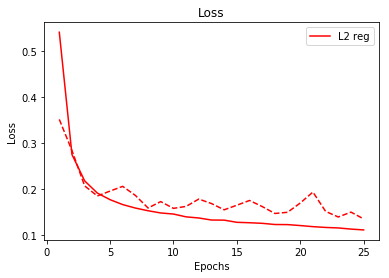

In [22]:
epochs = range(1, len(history1.history['acc']) + 1)

plt.plot(epochs, history2.history['loss'], 'r', linestyle='-', label='L2 reg')
plt.plot(epochs, history2.history['val_loss'], 'r', linestyle='--')

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [23]:
# Adding dropout

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history3 = network.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(val_images, val_labels))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 4s 96us/step - loss: 0.3592 - acc: 0.8940 - val_loss: 0.1848 - val_acc: 0.9456
Epoch 2/25
45000/45000 [==============================] - 4s 82us/step - loss: 0.1747 - acc: 0.9490 - val_loss: 0.1383 - val_acc: 0.9587
Epoch 3/25
45000/45000 [==============================] - 4s 82us/step - loss: 0.1339 - acc: 0.9607 - val_loss: 0.1128 - val_acc: 0.9678
Epoch 4/25
45000/45000 [==============================] - 4s 82us/step - loss: 0.1121 - acc: 0.9670 - val_loss: 0.1001 - val_acc: 0.9709
Epoch 5/25
45000/45000 [==============================] - 4s 86us/step - loss: 0.0963 - acc: 0.9710 - val_loss: 0.0917 - val_acc: 0.9739
Epoch 6/25
45000/45000 [==============================] - 4s 85us/step - loss: 0.0841 - acc: 0.9747 - val_loss: 0.0934 - val_acc: 0.9737
Epoch 7/25
45

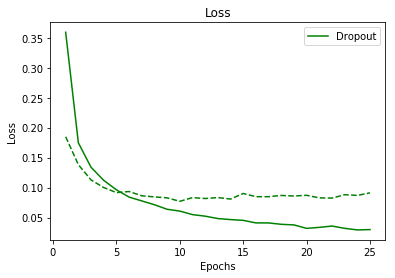

In [24]:
epochs = range(1, len(history1.history['acc']) + 1)

plt.plot(epochs, history3.history['loss'], 'g', linestyle='-', label='Dropout')
plt.plot(epochs, history3.history['val_loss'], 'g', linestyle='--')

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

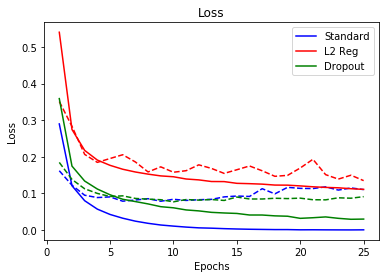

In [28]:
# Compare the 3 models

epochs = range(1, len(history1.history['acc']) + 1)

plt.plot(epochs, history1.history['loss'], 'b', linestyle='-', label='Standard')
plt.plot(epochs, history1.history['val_loss'], 'b', linestyle='--')

plt.plot(epochs, history2.history['loss'], 'r', linestyle='-', label='L2 Reg')
plt.plot(epochs, history2.history['val_loss'], 'r', linestyle='--')

plt.plot(epochs, history3.history['loss'], 'g', linestyle='-', label='Dropout')
plt.plot(epochs, history3.history['val_loss'], 'g', linestyle='--')

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [29]:
# Standard: overfitting
# L2 Reg: higher loss but no overfitting
# Dropout: loss in between and overfitting starts later